In [11]:
import pandas as pd

# Memuat dataset dengan pemisah yang benar (titik koma)
data = pd.read_csv('/content/winequality-white.csv', sep=';')

# Menampilkan beberapa baris pertama dari dataset
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
# Mengecek Nilai yang Hilang
print("Mengecek Nilai yang Hilang:")
print(data.isnull().sum())  # Menampilkan jumlah nilai yang hilang per kolom

missing_rows = data[data.isnull().any(axis=1)]
print(f"\nJumlah baris dengan nilai yang hilang: {len(missing_rows)}")
if not missing_rows.empty:
    print("Baris dengan nilai yang hilang:")
    print(missing_rows)

# Menghapus Nilai yang Hilang
df_cleaned_rows = data.dropna()
print(f"\nDataset setelah menghapus baris dengan nilai yang hilang: {df_cleaned_rows.shape}")

# Menghapus kolom dengan nilai yang hilang
df_cleaned_columns = data.dropna(axis=1)
print(f"Dataset setelah menghapus kolom dengan nilai yang hilang: {df_cleaned_columns.shape}")

df_filled = data.fillna(data.mean(numeric_only=True))
print("\nDataset setelah mengisi nilai yang hilang dengan rata-rata:")
print(df_filled)

Mengecek Nilai yang Hilang:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Jumlah baris dengan nilai yang hilang: 0

Dataset setelah menghapus baris dengan nilai yang hilang: (4898, 12)
Dataset setelah menghapus kolom dengan nilai yang hilang: (4898, 12)

Dataset setelah mengisi nilai yang hilang dengan rata-rata:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [19]:
# Statistik deskriptif untuk kolom numerik
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

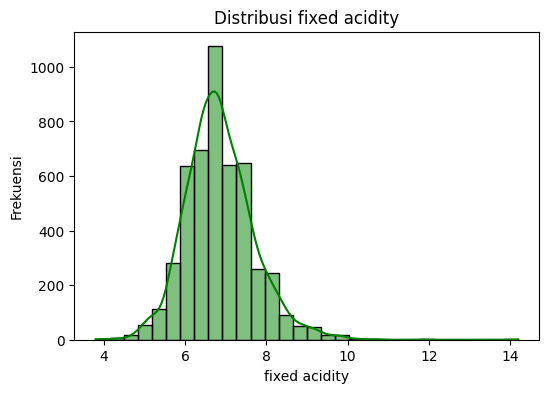

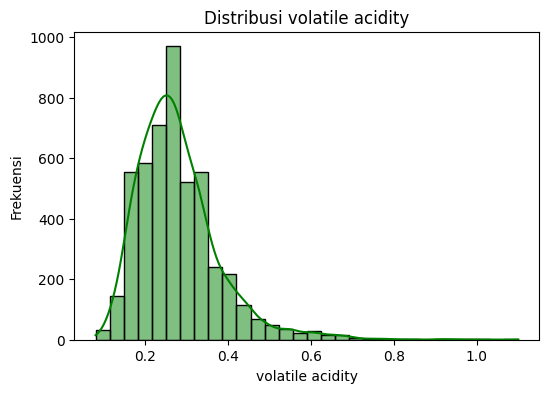

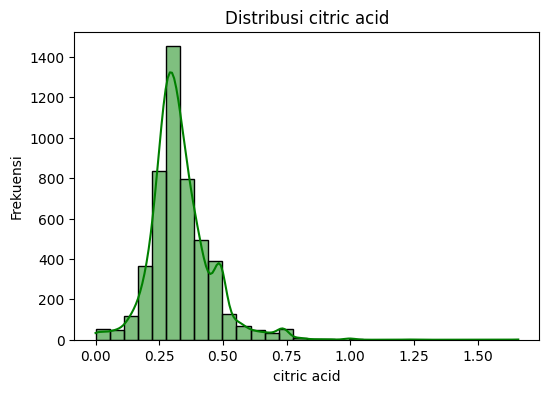

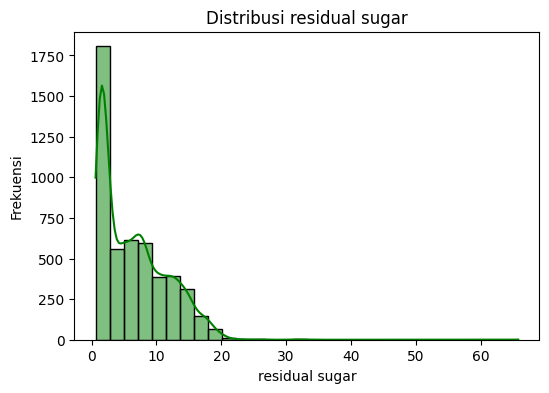

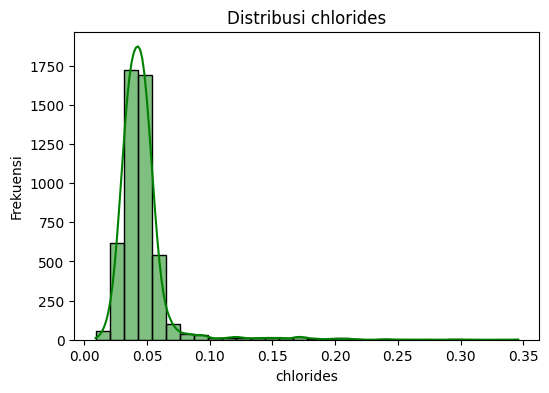

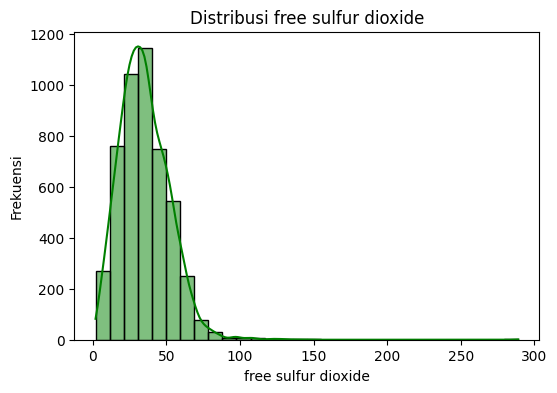

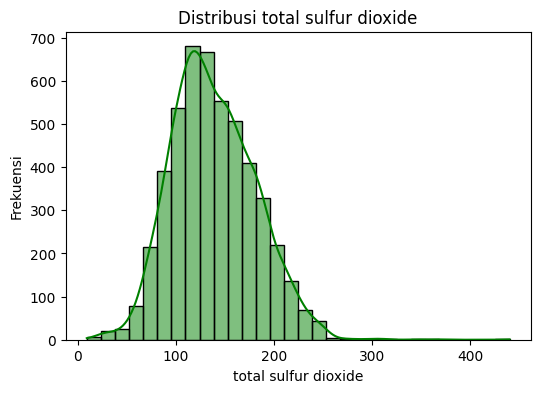

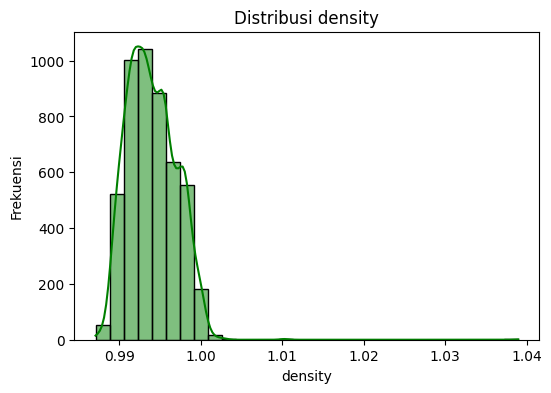

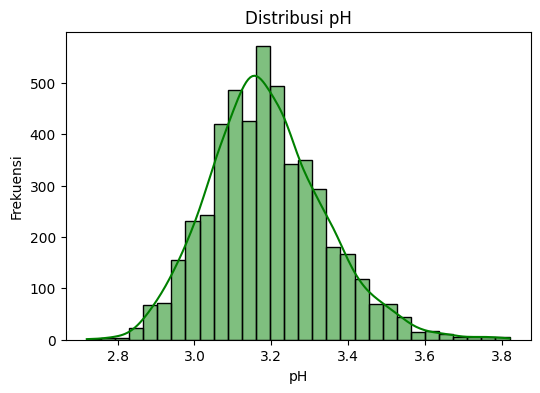

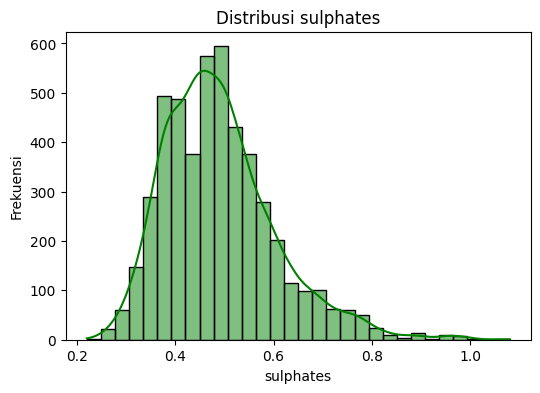

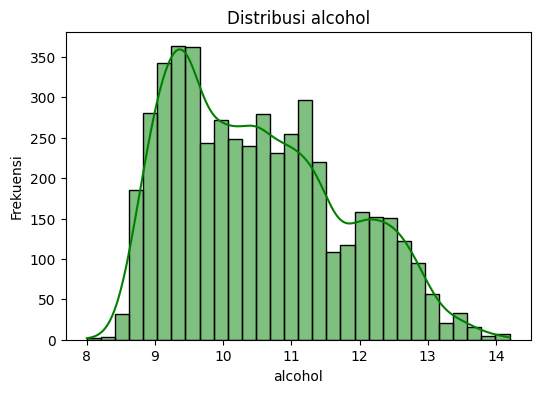

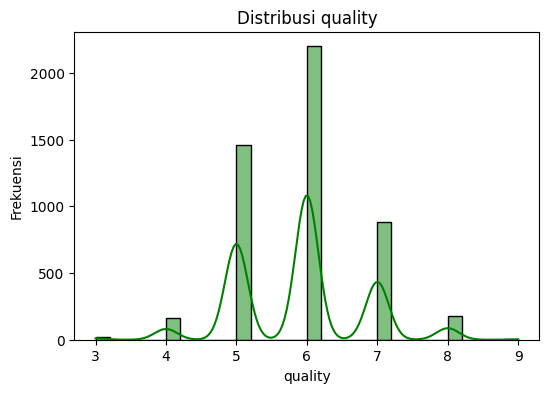

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Distribusi Variabel Numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True, color='green')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

<ipython-input-28-95908fe30915>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


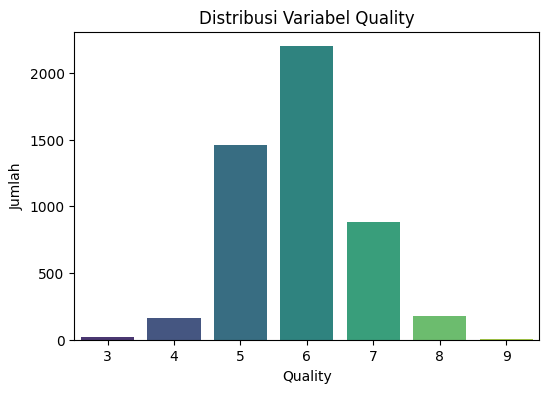

In [28]:
# Visualisasi Distribusi Variabel Quality
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribusi Variabel Quality')
plt.xlabel('Quality')
plt.ylabel('Jumlah')
plt.show()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Asumsi 'data' adalah DataFrame Anda dan 'y' adalah nama kolom variabel quality
X = data.drop('quality', axis=1)
y = data['quality']

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Fit encoder ke variabel target Anda dan transformasi
y = label_encoder.fit_transform(y)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mendefinisikan langkah-langkah preprocessing untuk fitur numerik dan kategorikal
fitur_numerik = X.select_dtypes(include=['number']).columns
fitur_kategorikal = X.select_dtypes(include=['object']).columns

transformer_numerik = Pipeline(steps=[
    ('scaler', StandardScaler())
])

transformer_kategorikal = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Membuat ColumnTransformer untuk menerapkan preprocessing ke masing-masing fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numerik, fitur_numerik),
        ('cat', transformer_kategorikal, fitur_kategorikal)
    ])

# Mendefinisikan model
models = {
    "Regresi Logistik": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-NN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi setiap model
hasil = {}
for nama, model in models.items():
    # Membuat pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Melatih pipeline
    pipeline.fit(X_train, y_train)

    # Membuat prediksi pada dataset uji
    y_pred = pipeline.predict(X_test)

    # Menghitung metrik evaluasi
    akurasi = accuracy_score(y_test, y_pred)

    # Update: Using 'weighted' average for multiclass
    presisi = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil
    hasil[nama] = {
        "Akurasi": akurasi,
        "Presisi": presisi,
        "Recall": recall,
        "F1-Score": f1
    }

    # Mencetak hasil untuk model saat ini
    print(f"\nEvaluasi {nama}:")
    print(f"  Akurasi: {akurasi:.4f}")
    print(f"  Presisi: {presisi:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluasi Regresi Logistik:
  Akurasi: 0.5316
  Presisi: 0.5191
  Recall: 0.5316
  F1-Score: 0.4978

Evaluasi Decision Tree:
  Akurasi: 0.6102
  Presisi: 0.6169
  Recall: 0.6102
  F1-Score: 0.6127

Evaluasi k-NN:
  Akurasi: 0.5429
  Presisi: 0.5372
  Recall: 0.5429
  F1-Score: 0.5364


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:59:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluasi XGBoost:
  Akurasi: 0.6796
  Presisi: 0.6770
  Recall: 0.6796
  F1-Score: 0.6740


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


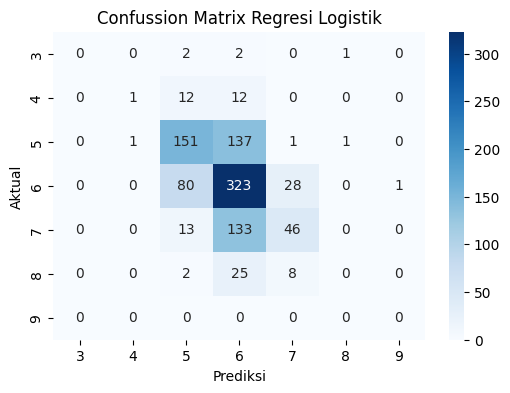

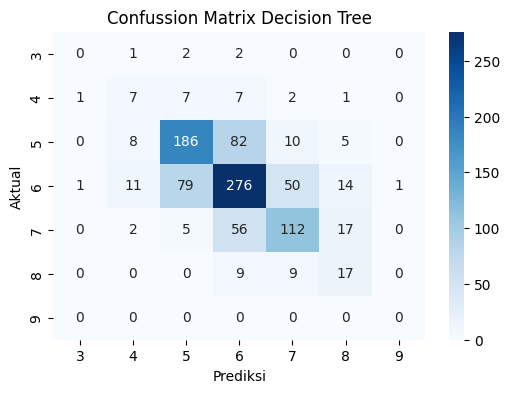

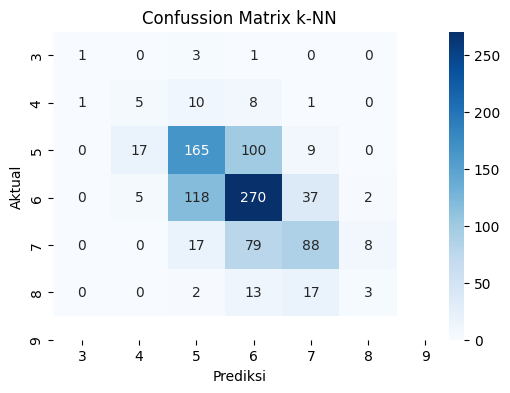

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


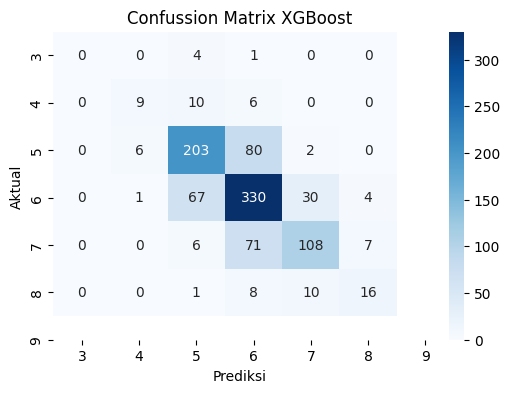

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for nama, metrik in hasil.items():
    # Melakukan prediksi menggunakan model saat ini
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[nama])
    ])

    pipeline.fit(X_train, y_train)

    y_prediksi = pipeline.predict(X_test)

    # Membuat dan menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_prediksi)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confussion Matrix {nama}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

# Grid hyperparameter untuk setiap model
param_grids = {
    "Regresi Logistik": {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    "Decision Tree": {
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
    },
    "k-NN": {
        'classifier__n_neighbors': [3, 5, 7, 10],
        'classifier__weights': ['uniform', 'distance']
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.01, 0.1, 0.3]
    }
}

# Inisialisasi dictionary hasil
hasil_tuning = {}

# Melakukan GridSearchCV untuk setiap model
for nama, param_grid in param_grids.items():

    # Inisialisasi pipeline model
    model = models[nama]
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1  # Gunakan semua prosesor
    )

    # Melatih GridSearchCV
    grid_search.fit(X_train, y_train)

    # Parameter terbaik dan skor terbaik
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    hasil_tuning[nama] = {'Parameter Terbaik': best_params, 'Skor Terbaik': best_score}

    print(f"Parameter Terbaik untuk {nama}: {best_params}")
    print(f"Akurasi Cross-Validated Terbaik untuk {nama}: {best_score:.4f}\n")

Parameter Terbaik untuk Regresi Logistik: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Akurasi Cross-Validated Terbaik untuk Regresi Logistik: 0.5426

Parameter Terbaik untuk Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Akurasi Cross-Validated Terbaik untuk Decision Tree: 0.5812

Parameter Terbaik untuk k-NN: {'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
Akurasi Cross-Validated Terbaik untuk k-NN: 0.6406



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:09:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Parameter Terbaik untuk XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Akurasi Cross-Validated Terbaik untuk XGBoost: 0.6552

